In [396]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [397]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

## Import data

In [398]:
#13k top spotify songs 
#df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")
df=pd.read_csv('data/df_hot.csv', sep=",")

In [399]:
df.head()

,track_id,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,3rUGC1vUpkDG9CZFHMur1t,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,...,0.844,0.0319,0,98.0,2.197867,50.511708,4.5,111.018,0.000000,0
1,7aqfrAY2p9BUSiupwk3svU,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,...,0.248,0.3200,1,91.0,4.124067,39.747175,49.5,655.680,0.000000,0
2,7dJYggqjKo71KI9sLzqCs8,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,...,0.392,0.0970,0,89.0,4.422667,27.817154,89.5,492.104,0.000391,0
3,4MjDJD8cW7iVeWInc2Bdyj,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,...,0.130,0.0680,0,94.0,4.453233,31.225851,21.0,556.224,0.002680,0
4,5aIVCx5tnk0ntmdiinnYvw,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,...,0.519,0.0755,0,92.0,3.337600,35.111158,37.5,468.748,0.000000,0


In [400]:
df.describe()

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
count,1.259400e+04,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,...,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000
mean,2.385551e+05,4135.184215,4870.247816,4.502938,0.553316,0.315991,0.592348,119.010716,0.182240,-9.627065,...,0.469516,0.084973,0.672622,50.297933,3.975918,35.102960,6180.605606,465.286804,537.973461,0.009370
std,1.263497e+05,2385.110827,2834.519720,6.384068,0.189292,0.361614,0.283803,31.161578,0.322545,6.945035,...,0.428565,0.110423,0.684204,19.924747,2.105828,18.796769,3633.365412,132.168642,11978.910413,0.096346
min,9.750000e+03,0.000000,0.000000,0.000000,0.000000,0.000001,0.000568,0.000000,0.000000,-44.150000,...,0.000000,0.000000,0.000000,0.000000,0.162500,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.771040e+05,2094.250000,2406.000000,4.000000,0.428000,0.016200,0.413000,97.484000,0.000000,-10.962500,...,0.219000,0.036700,0.000000,39.000000,2.951733,24.422204,3045.500000,380.037000,0.000000,0.000000
50%,2.119465e+05,4201.500000,4908.500000,4.000000,0.571000,0.128000,0.655000,121.940000,0.000332,-7.214500,...,0.423000,0.047400,1.000000,52.000000,3.532442,33.464736,6092.000000,480.024000,0.005413,0.000000
75%,2.592970e+05,6213.750000,7320.750000,4.000000,0.693000,0.606750,0.827000,137.689500,0.180000,-5.198000,...,0.644000,0.079600,1.000000,65.000000,4.321617,42.873465,9370.500000,543.818000,0.922067,0.000000
max,4.170227e+06,8136.000000,9764.000000,96.000000,0.978000,0.996000,0.999000,219.446000,0.986000,1.177000,...,5.000000,1.000000,11.000000,100.000000,69.503783,574.662857,12343.000000,926.355000,747863.247863,1.000000


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12594 entries, 0 to 12593
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   track_id                     12594 non-null  object 
 1   length                       12594 non-null  int64  
 2   artists                      12594 non-null  int64  
 3   album                        12594 non-null  int64  
 4   time_signature               12594 non-null  int64  
 5   danceability                 12594 non-null  float64
 6   acousticness                 12594 non-null  float64
 7   energy                       12594 non-null  float64
 8   tempo                        12594 non-null  float64
 9   instrumentalness             12594 non-null  float64
 10  loudness                     12594 non-null  float64
 11  liveness                     12594 non-null  float64
 12  key                          12594 non-null  float64
 13  valence         

In [402]:
df['favorite'].value_counts()

favorite
0    12476
1      118
Name: count, dtype: int64

In [403]:
print(df.shape)

(12594, 23)


In [404]:
df.head()

,track_id,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,...,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio,favorite
0,3rUGC1vUpkDG9CZFHMur1t,131872,7016,9646,1,0.750,0.2560,0.733,111.018,0.000000,...,0.844,0.0319,0,98.0,2.197867,50.511708,4.5,111.018,0.000000,0
1,7aqfrAY2p9BUSiupwk3svU,247444,2075,2891,4,0.470,0.0277,0.640,163.920,0.000000,...,0.248,0.3200,1,91.0,4.124067,39.747175,49.5,655.680,0.000000,0
2,7dJYggqjKo71KI9sLzqCs8,265360,2007,7025,4,0.750,0.2280,0.674,123.026,0.000089,...,0.392,0.0970,0,89.0,4.422667,27.817154,89.5,492.104,0.000391,0
3,4MjDJD8cW7iVeWInc2Bdyj,267194,742,9691,4,0.787,0.1500,0.621,139.056,0.000402,...,0.130,0.0680,0,94.0,4.453233,31.225851,21.0,556.224,0.002680,0
4,5aIVCx5tnk0ntmdiinnYvw,200256,7579,9135,4,0.673,0.0856,0.722,117.187,0.000000,...,0.519,0.0755,0,92.0,3.337600,35.111158,37.5,468.748,0.000000,0


In [422]:
# Selecting features and target
X = df[['valence', 'key', 'time_signature','artists','tempo','beat_density','speechiness','melody_complexity']]
#X = df[[ 'key', 'valence']]
#X= df.drop(columns=['length','track_id','favorite'])

#Target Column
y = df['favorite']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the features
X_scaled = scaler.fit_transform(X)

# Creating a DataFrame with the scaled features
X = pd.DataFrame(X_scaled, columns=X.columns)

In [406]:
print(X.shape)
print(y.shape)

(12594, 20)
(12594,)


In [407]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12594 entries, 0 to 12593
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   artists                      12594 non-null  float64
 1   album                        12594 non-null  float64
 2   time_signature               12594 non-null  float64
 3   danceability                 12594 non-null  float64
 4   acousticness                 12594 non-null  float64
 5   energy                       12594 non-null  float64
 6   tempo                        12594 non-null  float64
 7   instrumentalness             12594 non-null  float64
 8   loudness                     12594 non-null  float64
 9   liveness                     12594 non-null  float64
 10  key                          12594 non-null  float64
 11  valence                      12594 non-null  float64
 12  speechiness                  12594 non-null  float64
 13  mode            

Train & Testing data set 

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30, shuffle=True)

In [409]:
X_train.head(3)

,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,beat_density,Popularity_Rank,melody_complexity,instrumental_acoustic_ratio
3760,-1.192103,-1.601833,-0.078783,0.098709,-0.860623,0.485048,0.931995,-0.565028,0.289436,-0.533041,-0.115543,0.386150,-0.445332,0.478499,-0.567053,-0.629881,1.105298,0.877980,0.960335,-0.044912
386,-1.127533,-1.134011,-0.078783,1.181733,-0.367785,0.136200,-0.737980,-0.565014,0.572815,-0.432059,0.121271,-0.309222,-0.215298,-0.983112,0.838291,-0.309012,-0.331355,-0.980564,-0.614594,-0.044912
2893,0.768471,0.156559,-0.078783,-0.181293,-0.863222,1.320169,0.946565,-0.563961,0.573391,-0.582859,-0.431296,0.479488,-0.433559,-0.983112,0.486955,0.038877,0.079530,-0.527522,0.974076,-0.044904


##### fix the imbalanced data set 

In [410]:
from imblearn.over_sampling import SMOTE
# Train / Split Data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y) 

In [411]:
y_train.value_counts()

favorite
0    12476
1    12476
Name: count, dtype: int64

In [412]:
X_train.count()

artists                        24952
album                          24952
time_signature                 24952
danceability                   24952
acousticness                   24952
energy                         24952
tempo                          24952
instrumentalness               24952
loudness                       24952
liveness                       24952
key                            24952
valence                        24952
speechiness                    24952
mode                           24952
Popularity                     24952
minutes                        24952
beat_density                   24952
Popularity_Rank                24952
melody_complexity              24952
instrumental_acoustic_ratio    24952
dtype: int64

In [413]:
y_test.value_counts()

favorite
0    3743
1      36
Name: count, dtype: int64

In [414]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(24952, 20)
(24952,)
(3779, 20)
(3779,)


In [415]:
print(X.shape)
print(y.shape)

(12594, 20)
(12594,)


In [416]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.neighbors import KNeighborsClassifier  # Import KNN classifier

# Define your KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)


# Choose the number of folds for cross-validation (e.g., 5 or 10)
num_folds = 5

# Create a KFold object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X, y, cv=kfold, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print(f"Mean accuracy: {cv_scores.mean()}")

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


In [417]:
print("CV Error on Test Set: {}".format(cross_val_score(est_model_lr, X_train, y_train, cv=10)))

CV Error on Test Set: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## ML Algo

In [418]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV

## KNN's  

In [419]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [420]:
prediction = knn.predict(X_test)
prediction
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3743
           1       1.00      1.00      1.00        36

    accuracy                           1.00      3779
   macro avg       1.00      1.00      1.00      3779
weighted avg       1.00      1.00      1.00      3779



In [424]:
from sklearn.model_selection import cross_val_score, KFold

# Assuming X and y are your features and target variable

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Define the number of folds for cross-validation
num_folds = 5

# Initialize KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kf)

# Output the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [425]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

NameError: name 'y_pred' is not defined

In [347]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the y variable
y_train = y_train.values.ravel()  # Reshape y_train to a 1D array
y_test = y_test.values.ravel()    # Reshape y_test to a 1D array
# Instantiate and Train the k-NN Model


In [348]:
y_train

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [349]:
k = 5  # Define the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Evaluate the Model
predictions = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the k-NN model: {accuracy}")


Accuracy of the k-NN model: 1.0


In [350]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [278]:
reg2 = KNeighborsRegressor(n_neighbors=5)
reg2.fit(x_train,y_train)
y_pred2 = reg2.predict(x_test)
mse2 = mean_squared_error(y_test,y_pred2)
print("MSE KNN = 5:", mse2)

NameError: name 'KNeighborsRegressor' is not defined

# Log Regression

In [279]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

1.0


In [282]:
# starting out with simple logistic regression
from sklearn.linear_model import LogisticRegressionCV

est_model_lr = LogisticRegressionCV().fit(X_train, y_train)

print("Logisic Regression R^2 Error on Train Set: {}".format(est_model_lr.score(X_train,y_train)))
print("CV Error on Train Set: {}".format(cross_val_score(est_model_lr, X_train, y_train, cv=10)))
print("CV Error on Test Set: {}".format(cross_val_score(est_model_lr, X_train, y_train, cv=10)))


Logisic Regression R^2 Error on Train Set: 1.0
CV Error on Train Set: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
CV Error on Test Set: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [179]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

1.0
CPU times: total: 750 ms
Wall time: 499 ms


In [127]:
X_test


,artists,key,valence,time_signature
8821,3793,1.0,0.0862,4
7819,208,1.0,0.4740,4
3068,4064,4.0,0.8670,4
9125,514,7.0,0.7620,3
12051,2069,6.0,0.1110,4
...,...,...,...,...
4064,7260,5.0,0.1750,4
12005,1100,7.0,0.8220,4
9240,1468,5.0,0.1610,4
4313,647,1.0,0.6180,4


### Decision Tree

In [180]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 3}

In [123]:
%%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: total: 672 ms
Wall time: 680 ms


1.0

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Train-Test Split
X = df[:, :-1]  # Features
y = df[:, -1]    # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split

# Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping the y variable
y_train = y_train.ravel()  # Reshape y_train to a 1D array
y_test = y_test.ravel()    # Reshape y_test to a 1D array

# Instantiate and Train the k-NN Model
k = 5  # Define the value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Evaluate the Model
predictions = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the k-NN model: {accuracy}")

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
  # Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, np.ravel(y_train))
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 

[0 0 0 ... 0 0 0]


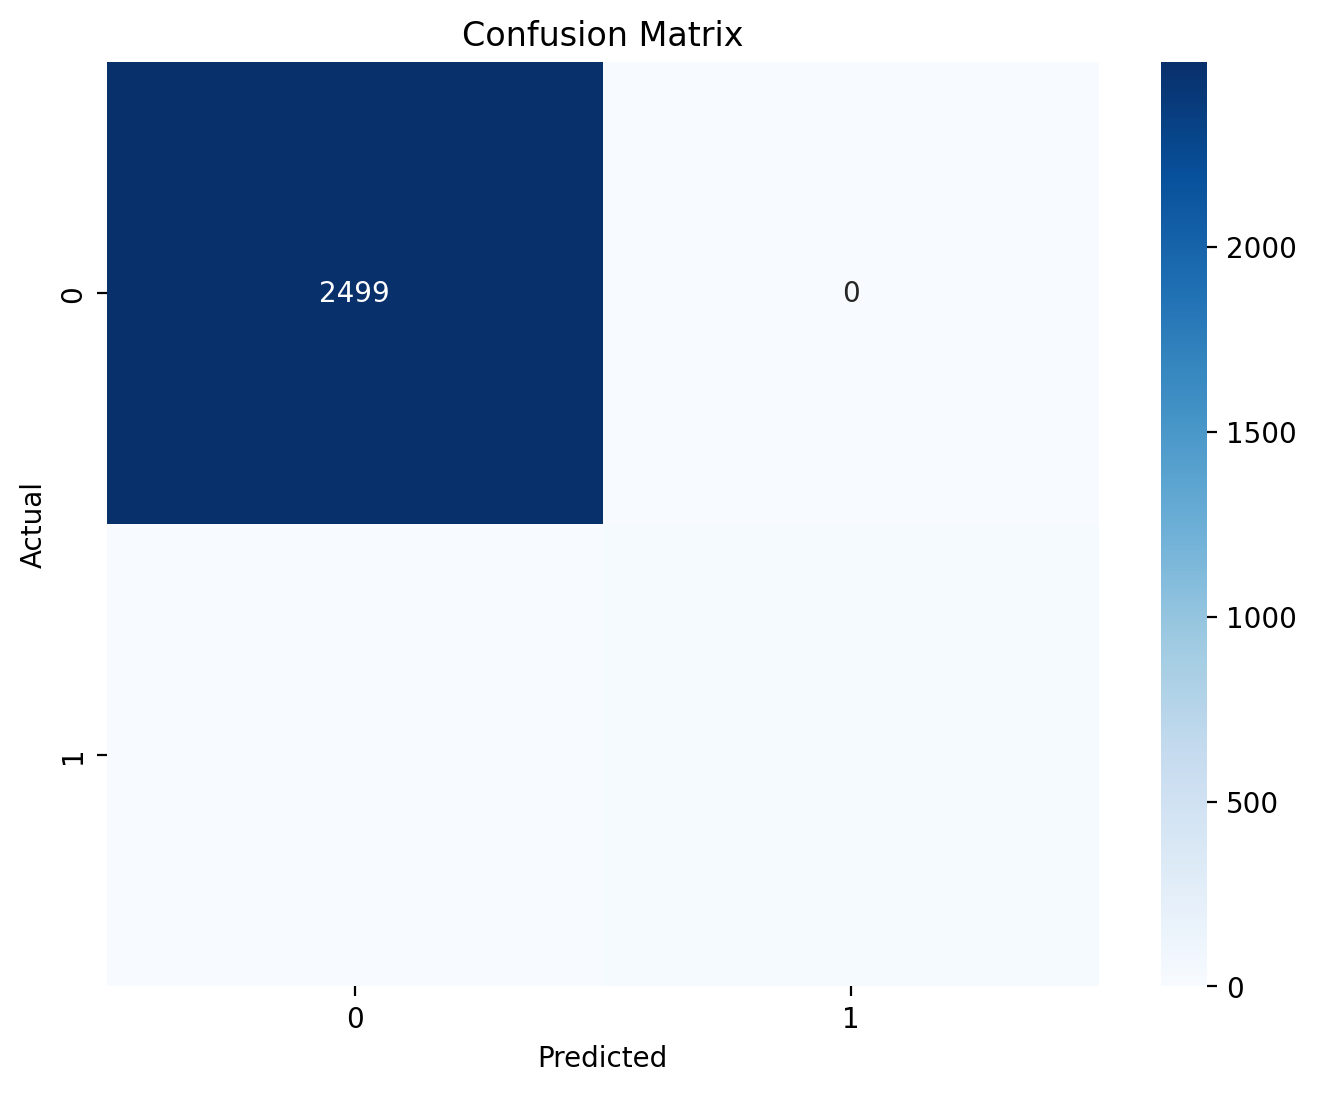

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Optional - for a nicer visualization


# Get predictions from the model
predictions = knn.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Using seaborn for a heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Descision tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report


# Create and fit the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2499
           1       1.00      1.00      1.00        20

    accuracy                           1.00      2519
   macro avg       1.00      1.00      1.00      2519
weighted avg       1.00      1.00      1.00      2519



In [ ]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

NameError: name 'Pipeline' is not defined

In [ ]:
# Checking for imbalance
y_test.value_counts()

favorite
0           2499
1             20
Name: count, dtype: int64

In [ ]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=30))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

pipe.score(X_test, y_test)